# EDA To Prediction

## Part1 : EDA

### 1. import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/user/Desktop/학교/학회/21-1/kaggle1/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# null 개수 세기
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Age, Cabin, Embarked에 null 값이 있음

### 2. How many Survived

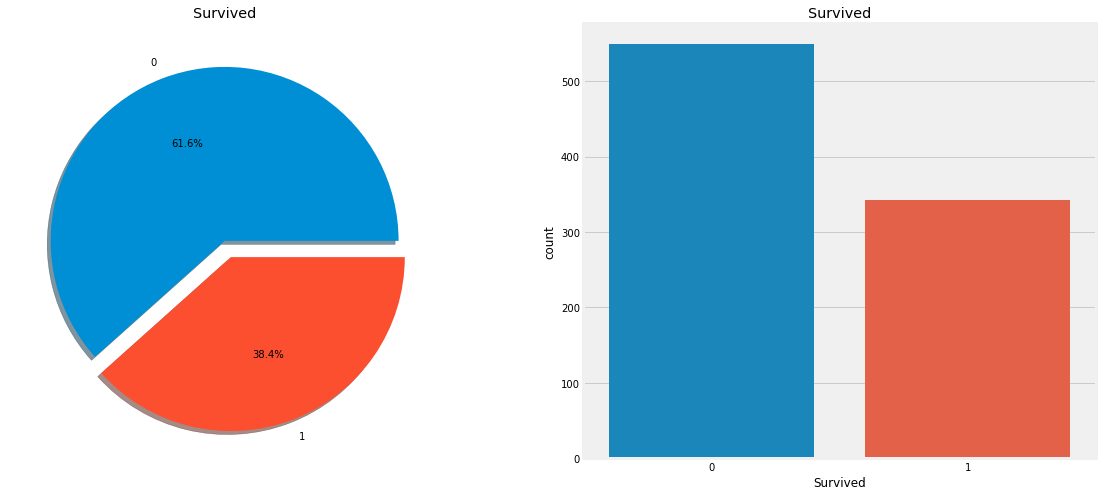

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# pie plot 설정
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow= True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# count plot 설정 
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 3. Analysing the features

#### 1) Sex--> Categorical Feature

In [6]:
# categorical feature로 바꾸기
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

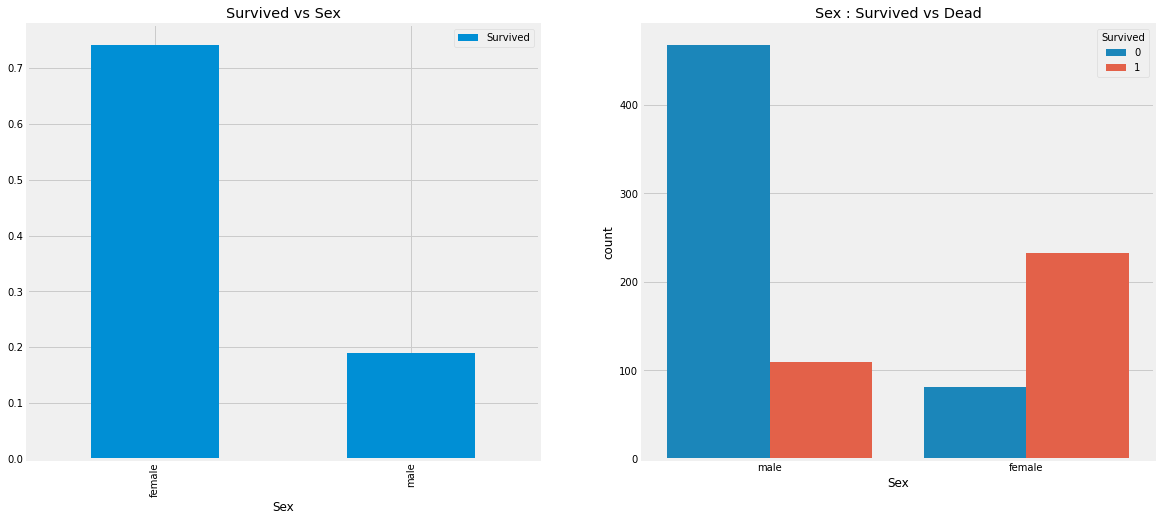

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# bar plot 설정
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 성별에 따른 생존 count plot 설정 
sns.countplot('Sex',hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

#### 2) Pclass --> Ordinal Feature

남성의 생존률이 여성에 비해 낮음

In [8]:
# Pclass에 따른 생존 cross tab
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


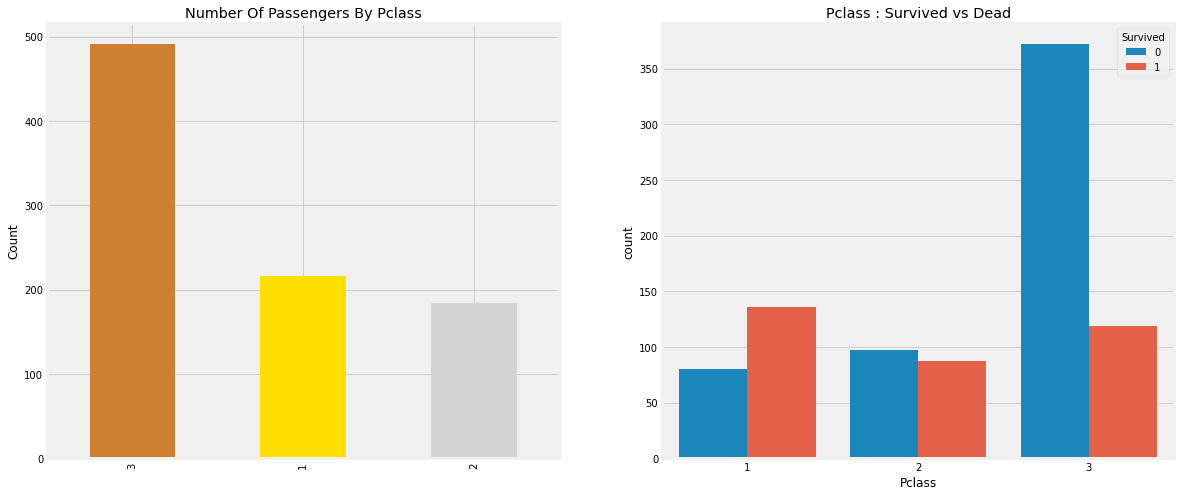

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# bar plot 설정
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# Pclass에 따른 생존 count plot 설정 
sns.countplot('Pclass',hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

Pclass가 높은경우(1>2>3) 생존률이 높음

In [10]:
# 성별, Pclass에 따른 생존 cross tab
pd.crosstab([data.Sex, data.Survived], data.Pclass,  margins=True).style.background_gradient(cmap = 'summer_r')

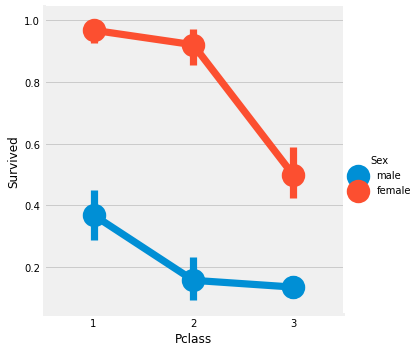

In [11]:
# 성별, Pclass에 따른 생존률 factor plot
sns.factorplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

성별, Pclass에 따른 생존률을 잘보여줌. 예를들어 Pclass가 1인 여성의 경우 생존률이 95%정도

#### 3) Age--> Continous Feature

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


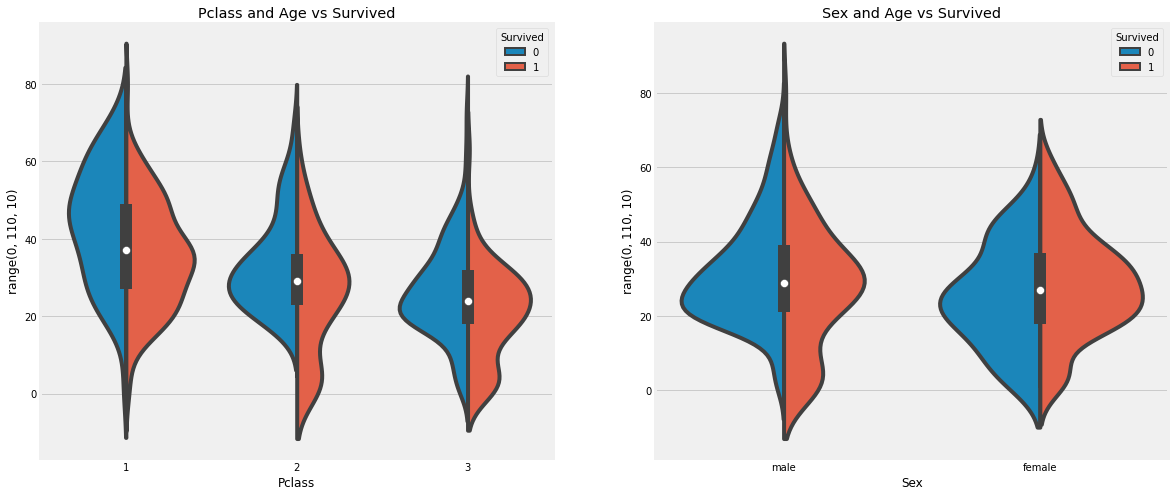

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# Pclass와 Age에 따른 생존 violin plot 설정
sns.violinplot('Pclass','Age', hue='Survived', data= data, split= True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_ylabel(range(0,110,10))

# 성별과 Age에 따른 생존 violin plot 설정 
sns.violinplot('Sex','Age', hue='Survived', data= data, split= True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_ylabel(range(0,110,10))
plt.show()

In [14]:
# Mr, Mrs 등 추출작업
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
# 성별에 따른 Initial수
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
# misspelled initial 교체
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
# Initial에 따른 나이의 평균
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
# Nan 값을 각 Initial평균 값으로 대체
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
# null값 여부 확인
data.Age.isnull().any()

False

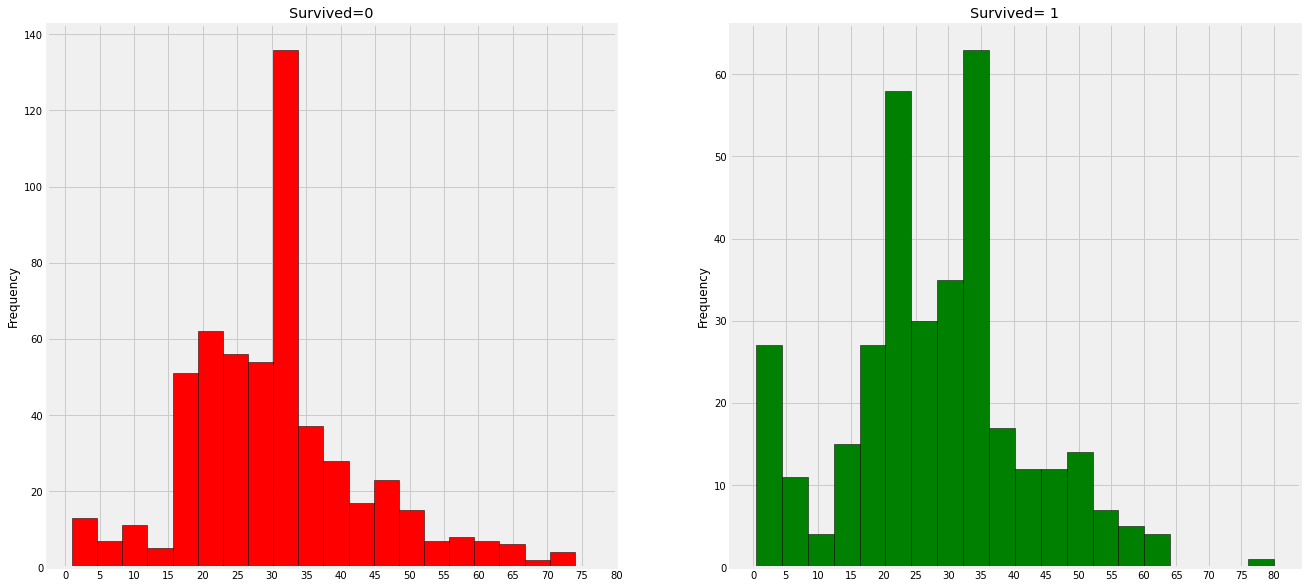

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
# Age에 따른 사망 hist plot 설정
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

# Age에 따른 생존 hist plot 설정
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

유아의 경우(5세 미만) 생존률이 높았고, 80세 이상은 전부 생존. 가장 많이 죽은 나이대는 30대.

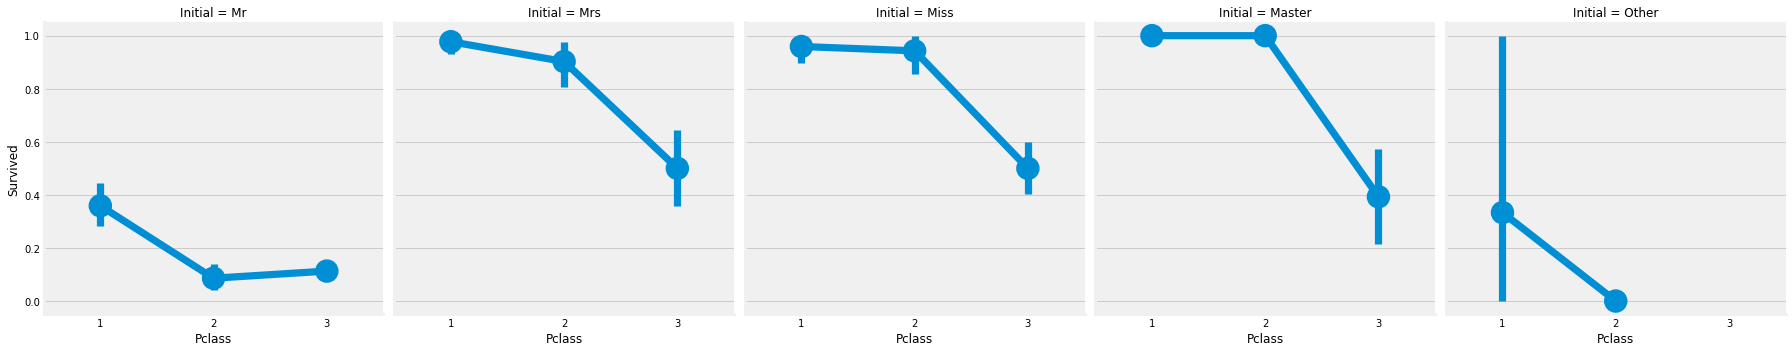

In [21]:
# Pclass, Initial에 따른 생존 factor plot 설정
sns.factorplot('Pclass','Survived', col='Initial', data=data)
plt.show()

여성과 아이의 우선 정책은 Pclass에 무관.

#### 4) Embarked--> Categorical Value

In [22]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

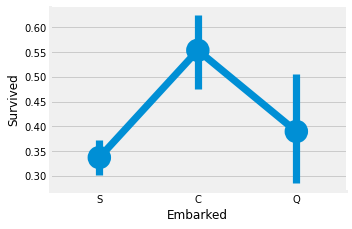

In [23]:
sns.factorplot('Embarked','Survived',data= data)
fig=plt.gcf() # 뭐지?
fig.set_size_inches(5,3)
plt.show()

port C의 생존률이 0.55로 제일 높음.

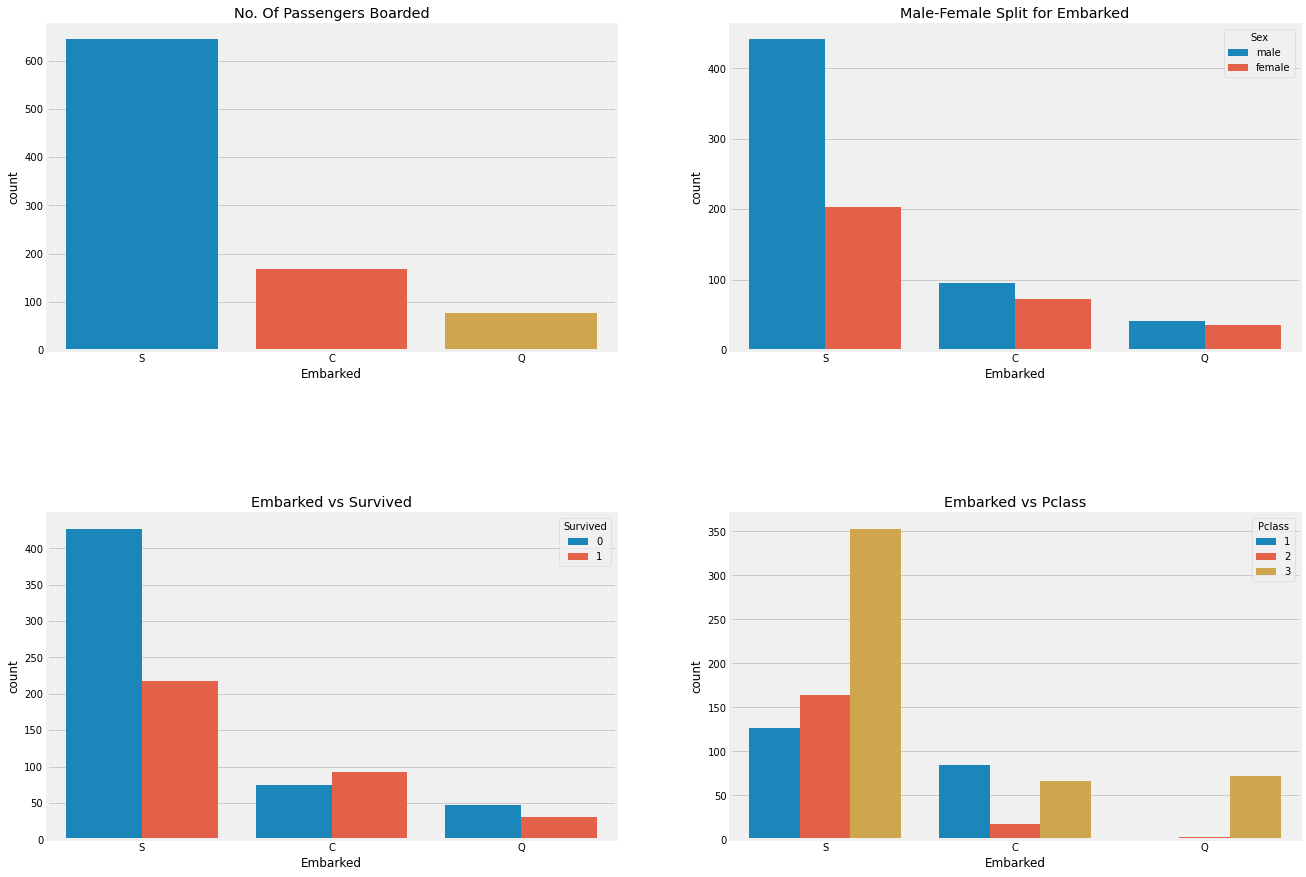

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
# Embarked에 따른 승객 수 hist plot 설정
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

# Embarked, Sex에 따른 승객 수 hist plot 설정
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# Embarked, Survived에 따른 승객 수 hist plot 설정
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# Embarked, Pclass에 따른 승객 수 hist plot 설정
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

가장 많은 승객이 탄 곳은 S이고, 여기서 Pclass3의 인원이 제일 많음.

C에서 탄 승객이 제일 생존율이 높음.

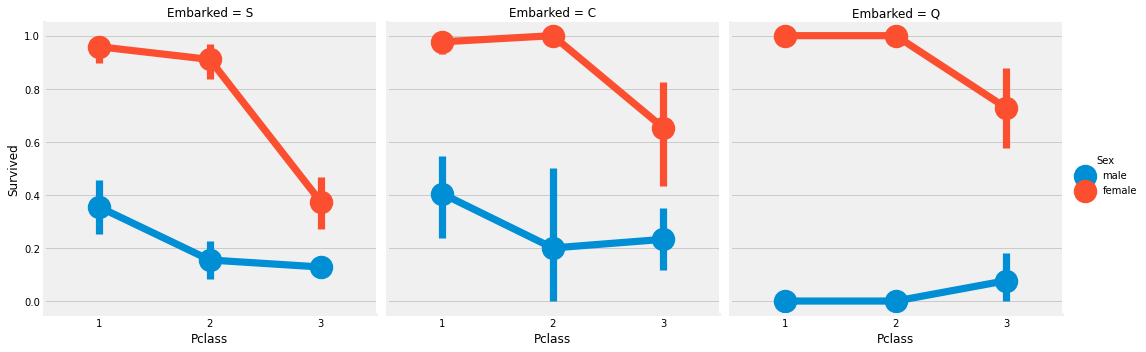

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

S에서 탄 승객 중 Pclass가 3인 남성과 여성은 생존율이 낮음.

Q에서 탄 남성이 제일 생존율이 낮음.

In [26]:
# Nan값 대체
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any()

False

#### 5) SibSip-->Discrete Feature

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


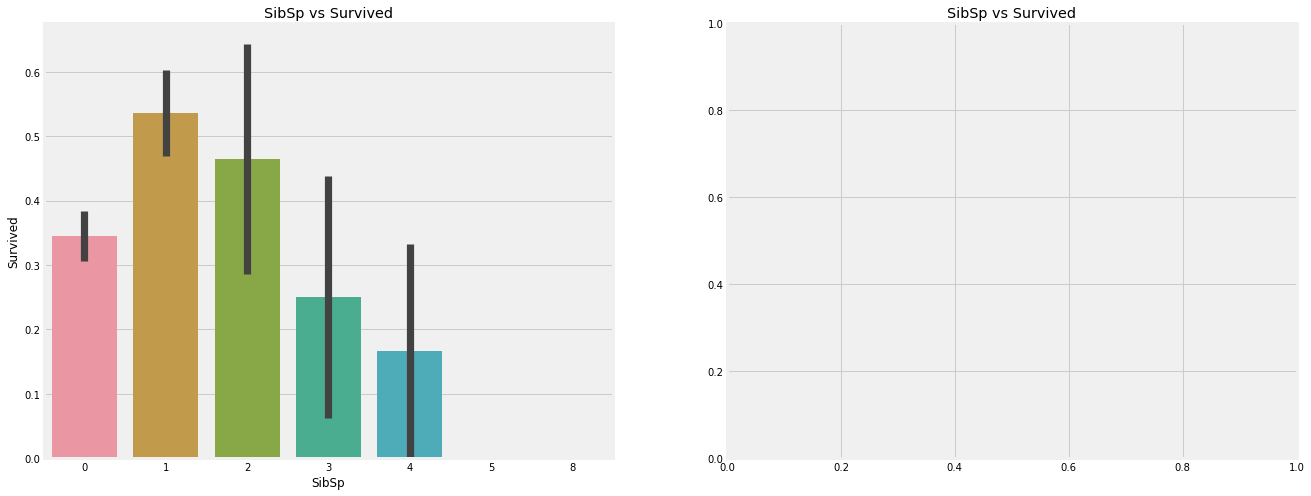

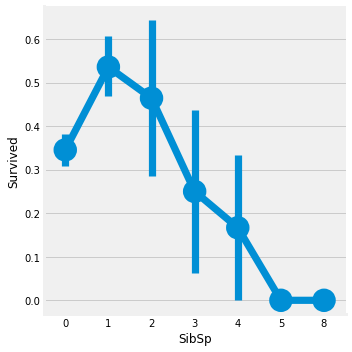

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(3) #원래 2
plt.show()

왜 이렇게 뜨는지? - factor plot이 subplot에 들어가지 못하고 튕긴다고 판단함

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


외동인 경우 생존률이 34.5%이지만 형제자매가 늘어나면 생존률이 떨어진다.

5~8명인 경우의 생존률은 0%인데, 그 이유는 대가족인 경우는 Pclass가 3이기 때문.

#### 6) Parch

In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


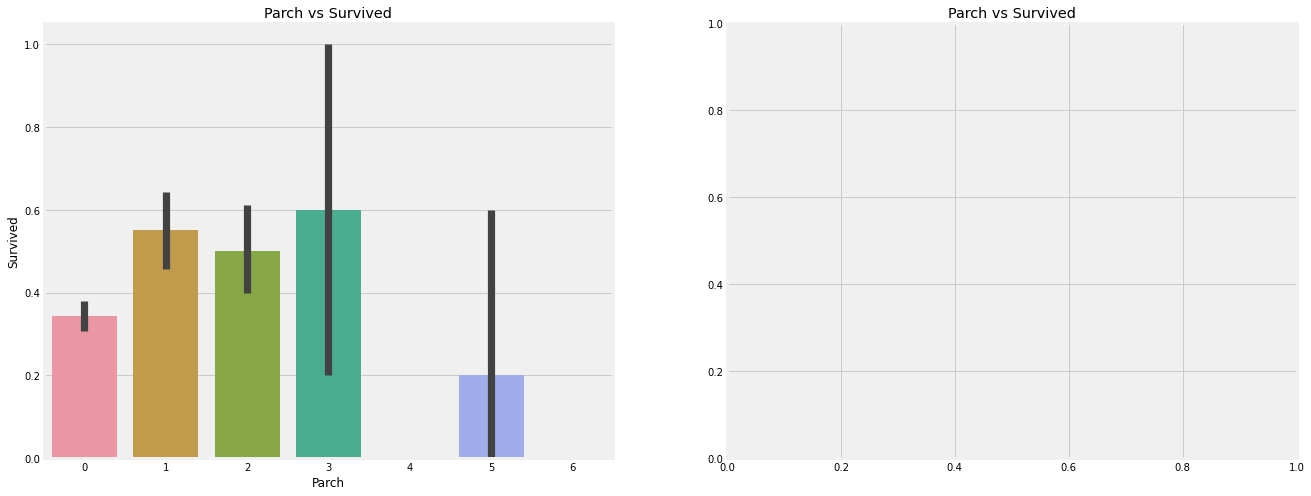

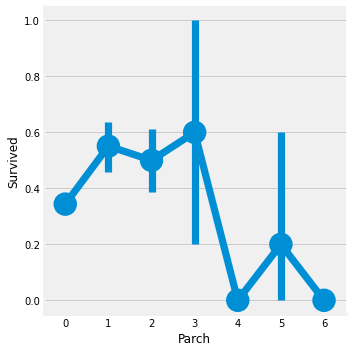

In [32]:
f,ax= plt.subplots(1,2, figsize=(20,8))
# Parch에 따른 생존율 bar plot
sns.barplot('Parch','Survived', data= data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

# Parch에 따른 생존율 factor plot
sns.factorplot('Parch','Survived', data= data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(3) #원래 2
plt.show()

Parch의 경우도 비슷함.부모님이 있는 경우 어느정도 생존율이 올라가다가 수가 많아지면 생존율이 낮아짐.

#### 7) Fare--> Continous Feature

In [33]:
# 요금의 max, min, average
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2042079685746


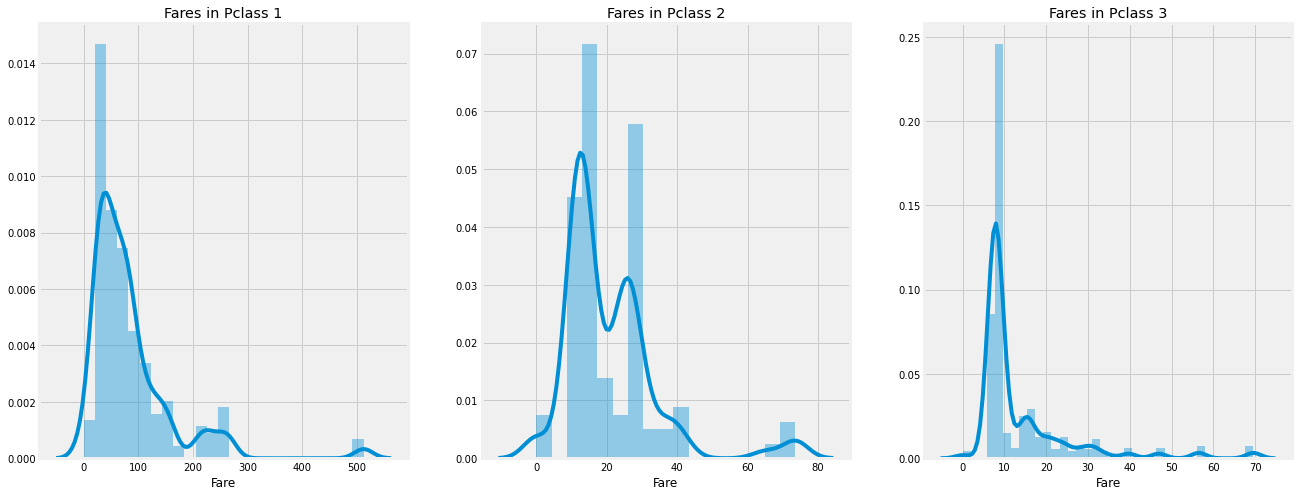

In [34]:
f,ax=plt.subplots(1,3, figsize=(20,8))
# Pclass가 1인 fare의 dist plot
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

# Pclass가 2인 fare의 dist plot
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

# Pclass가 3인 fare의 dist plot
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass가 1인 경우의 승객 요금에 큰 분포가 있음 - x축 범위가 넓다는 뜻

### 4. Correlation Between The Features

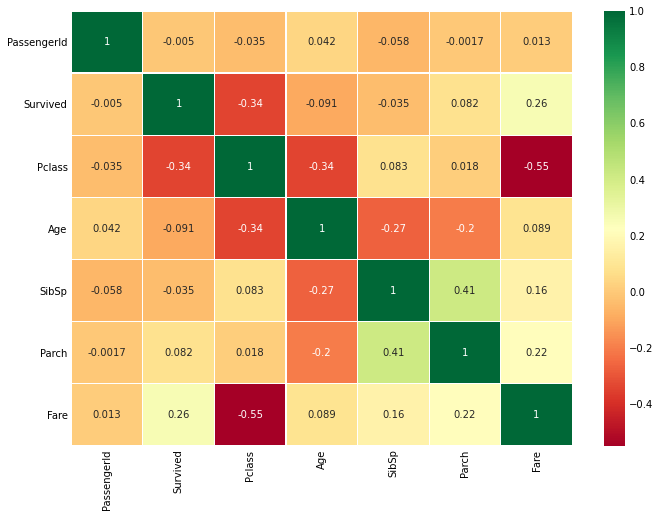

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

annot 옵션- 각 셀에 숫자 입력(annotate each cell with numeric value)

plt.gcf() - 현재의 Figure 객체를 구할 수 있음.

양의 상관관계: Parch-SibSp(0.41), Fare-Survived(0.26)

음의 상관관계: Fare-Pclass(-0.55), Survived-Pclass(-0.34), SibSp-Age(-0.27)

## Part2 : Feature Engineering and Data Cleaning

### 1. Age_band 

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0 # age가 16이하인 경우 age_band=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
# band age별 인원 수 분포 확인
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


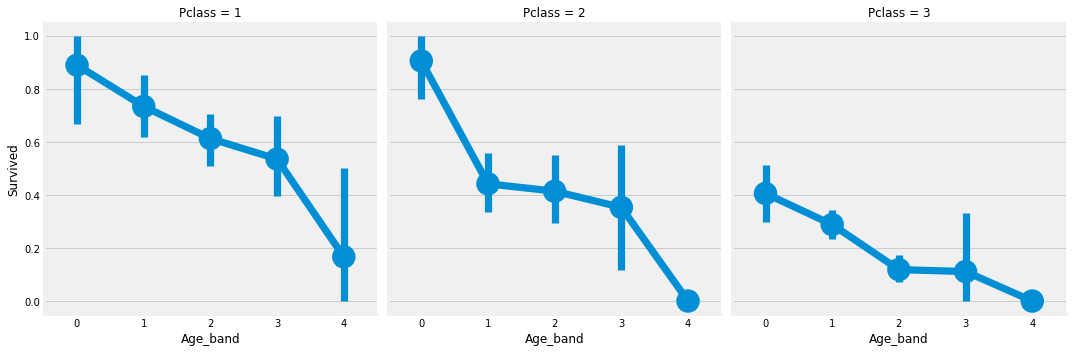

In [38]:
# Pclass에 따른 age_band별 생존율 factor plot 
sns.factorplot('Age_band','Survived', data=data, col='Pclass')
plt.show()

age band가 커질수록 생존율 감소.

### 2. Family Size and Alone

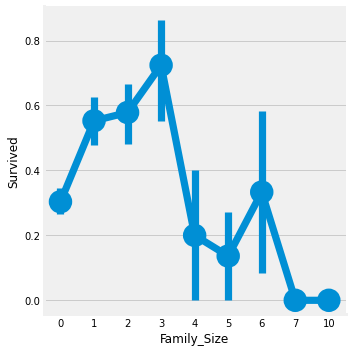

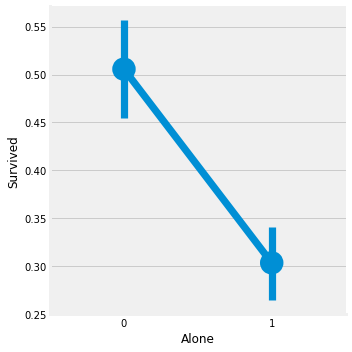

In [39]:
# Family Size 변수 생성
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
# Alone 변수 생성
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

# family size에 따른 생존율 factor plot
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

# family size에 따른 생존율 factor plot
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Alone','Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1) #원래 2
plt.close(3)
plt.show()

alone인 경우 생존율이 약 30%. 

family size가 3 이하인 경우 생존율은 구성원 수가 증가하면 같이 증가. 그 이후엔 감소.

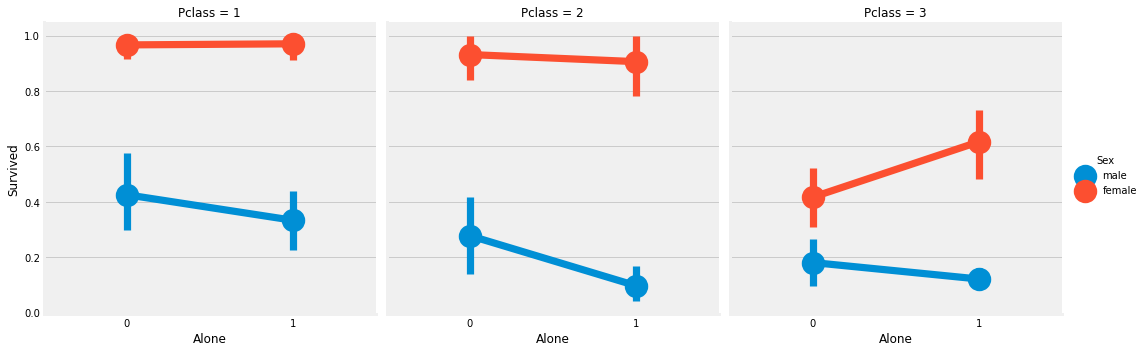

In [40]:
# Pclass에 따른 alone 유무의 생존율 차이 factor plot
sns.factorplot('Alone','Survived', data=data, hue='Sex', col='Pclass' )
plt.show()

Pcalss가 1,2인 경우 혼자인 것이 더 위험. 

Pclass가 3인 경우 여성은 가족이 있는 경우 생존율이 더 낮음.

### 3. Fare_Range

In [41]:
# Fare_Range 변수 생성
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


pd.cut(): 동일 간격으로 나누기
pd.qcut(): 동일 개수로 나누기

Fare_Range가 증가할수록 생존율도 증가

In [42]:
# Fare_Cat 변수 만들기(age_band와 동일)
data['Fare_Cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_Cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_Cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_Cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_Cat'] = 3

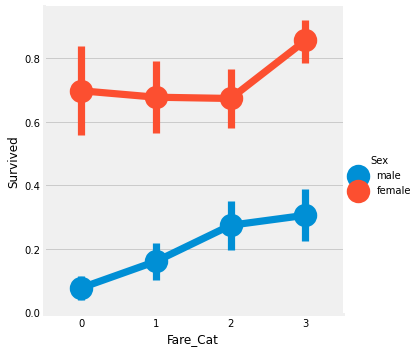

In [43]:
# Fare_Cat에 따른 성별 간 생존율 차이 factor plot 
sns.factorplot('Fare_Cat', 'Survived', data=data, hue='Sex')
plt.show()

성별에 상관없이 fare_cat이 증가할수록 생존율도 증가하는 경향.

### 4. Converting String Values into Numeric

In [44]:
# String Values을 Numeric으로 변환
data['Sex'].replace(['male','female'],[0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

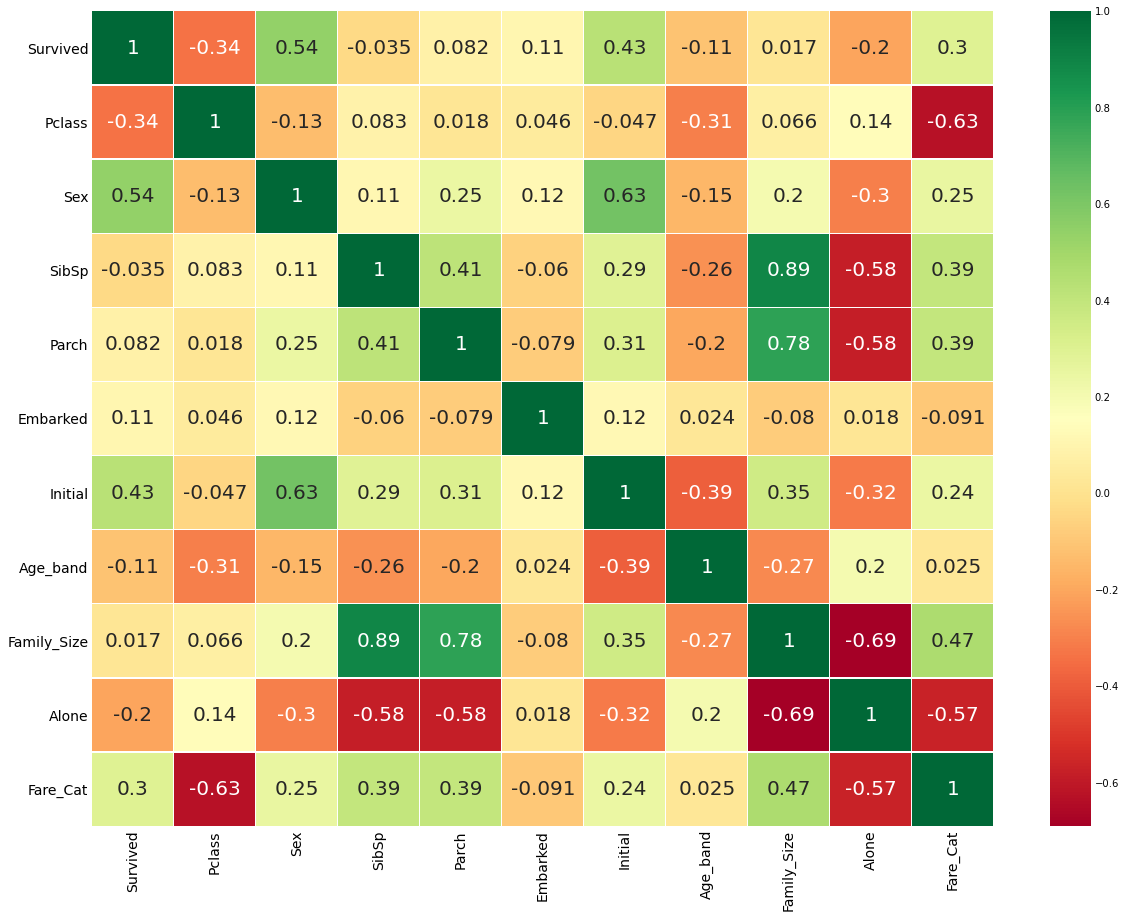

In [45]:
# 필요 없는 변수 제거
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns. heatmap(data.corr(),annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

annot_kws={'size':20} - 셀 안의 숫자 크기 설정

->위 코드 두번 실행하면 오류 (이미 drop했기 때문)

양의 상관관계: SibSp - Family_Size, Parch - Family_Size 

음의 상관관계: Alone - Family_Size

## Part3 : Predictive Modeling

### 1. Accuracy

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

In [47]:
# train, test 분리
train,test = train_test_split(data,test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

stratify - 데이터를 학습용과 테스트용으로 쪼개는 과정에서 어느 샘플 비중을 높이지 않으면서 쪼개기 전의 비율을 그대로 유지함

#### 1)  Radial Support Vector Machines (rbf-SVM)

In [48]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


rbf- RBF(Radial Basis Function) 커널 종류

gamma 값- 모델의 복잡도

C값- 잘못 분류된 포인트들이 모델에 영향을 주는 정도

0.835820895522388

#### 2) Linear Support Vector Machine (linear-SVM)

In [49]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


0.8171641791044776

#### 3) Logistic Regression

In [50]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is  0.8134328358208955


0.8134328358208955

#### 4) Decision Tree

In [51]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


0.8022388059701493

#### 5) K-Nearest Neighbours(KNN)

In [52]:
# 기본값 5에 대한 n_neighbours의 정확도 구하기
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


0.832089552238806

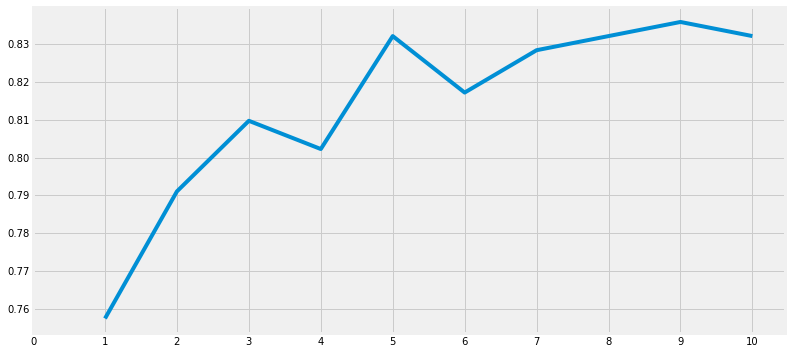

Accuracies for different values of n are:  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [53]:
# 다양한 n에 대한 n_neighbours의 정확도 구하기
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))   
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are: ', a.values, 'with the max value as ', a.values.max())

0.835820895522388

#### 6) Gaussian Naive Bayes

In [54]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


0.8134328358208955

#### 7) Random Forests

In [55]:
model = RandomForestClassifier(n_estimators=100) # tree 개수 100개
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forest is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forest is  0.8283582089552238


0.8246268656716418

### 2. Cross Validation

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# k-fold 10번 반복
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers = ['Linear Svm','Radial Svm','Logistic Regression',
             'KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), 
          GaussianNB(), RandomForestClassifier(n_estimators=100)]

# 각 분류기 별로 cv의 평균, 분산 구함
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv=kfold, scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, 
                                     index=classifiers) 
new_models_dataframe2
    

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.804757,0.026295
Naive Bayes,0.801386,0.028999
Random Forest,0.810350,0.034090


cv_result = cv_result 이거 왜 필요??

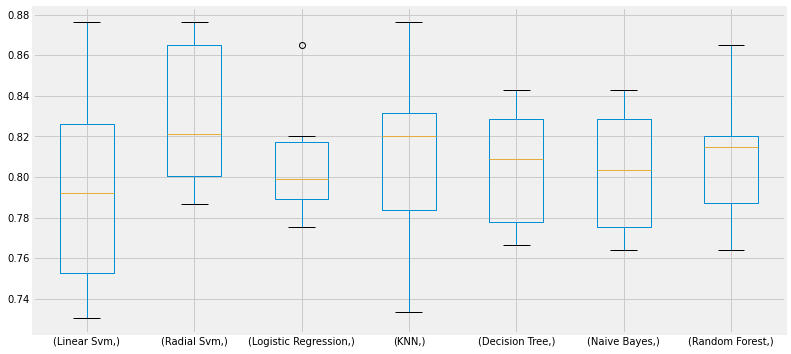

In [57]:
# 위에서 얻은 dataframe에 대한 box plot
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

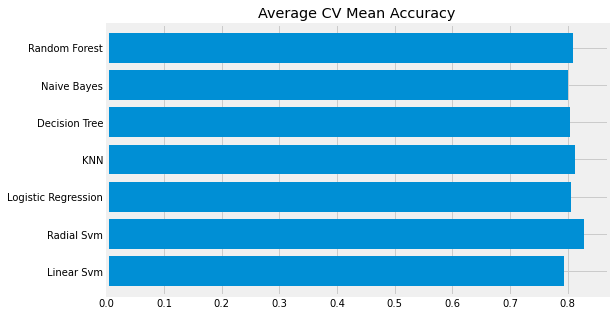

In [58]:
# 
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

불균형으로 인해 분류기의 정확도가 잘못 될 수 있음. 

혼동 행렬을 이용해 모델이 어디에서 잘못되었는지, 모델이 잘못 예측한 클래스를 보여줌으로써 요약 결과를 얻을 수 있음.

#### 1) Confusion Matrix

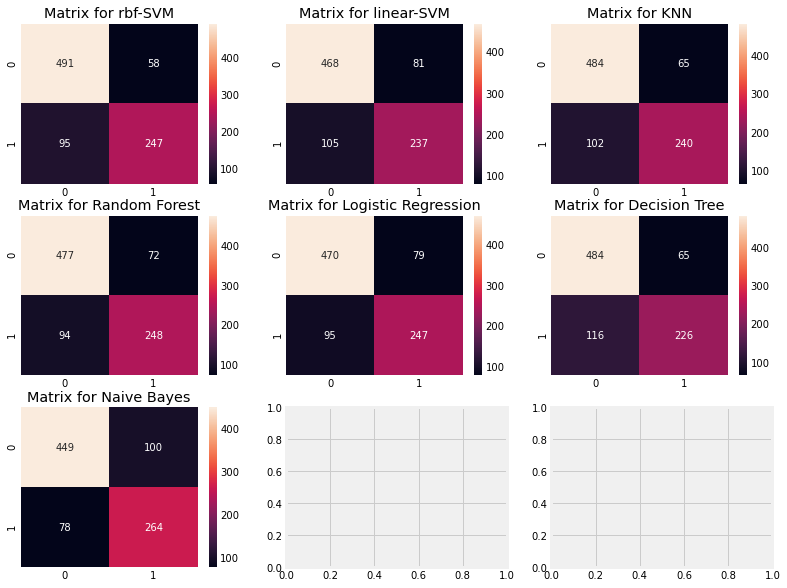

In [59]:
f,ax = plt.subplots(3,3, figsize=(12,10))
# rbf-SVM의 혼동 행렬 heat map
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

# linear-SVM의 혼동 행렬 heat map
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for linear-SVM')

# KNN의 혼동 행렬 heat map
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

# Random Forest의 혼동 행렬 heat map
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random Forest')

# Logistic Regression의 혼동 행렬 heat map
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

# Decision Tree의 혼동 행렬 heat map
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

# Naive Bayes의 혼동 행렬 heat map
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

fmt- 표시되는 숫자의 형태

하이퍼파라미터 튜닝- SVM, RandomForest

In [61]:
# SVM
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] 
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   40.9s finished


0.3, 0.4 사이에 0.25는 오타?

GridSearchCV- 딕셔너리 형태로 검색 대상 매개변수를 지정하며 필요한 모든 모델을 학습

verbose-  상세한 로깅 logging 을 출력할지 말지를 조정하는 parameter

-> 0 = silent, 
1 = progress bar, 
2 = one line per epoch.

In [62]:
# Random Forest
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.4min finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-SVM의 best score: 82.83%, C=0.4, gamma=0.3

RandomForest의 best score: 81.93%, n_estimators=300

캐글 예시랑 다른 결과?

### 3. Ensembling

#### 1) Voting Classifier
서로 다른 알고리즘을 가진 분류기가 예측한 결과 값을 투표를 통해 결정

In [65]:
# voting (ensemble)
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)), 
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT',DecisionTreeClassifier(random_state=0)),
                                               ('NB', GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True)),
                                               ], voting='soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))

# cv
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


ensembled model의 accuracy: 82.46%

ensembled model의 cv score: 82.49%

#### 2) Bagging
서로 같은 알고리즘을 가진 분류기가 예측한 결과 값을 투표를 통해 결정
1. bagged KNN

In [70]:
# bagged KNN
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))

# cv score
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())


The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


bagged KNN의 accuracy: 83.58%

bagged KNN의 cv score: 81.60%


2. bagged  Decision Tree

In [72]:
# bagged Decision Tree
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))

# cv score
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


bagged Decision Tree의 accuracy: 82.09%

bagged Decision Tree의 cv score: 81.71%

#### 3) Boosting
여러개의 분류기가 순차적으로 학습을 수행하며 다음 분류기에 가중치를 부여하면서 학습, 예측

1. AdaBoost(Adaptive Boosting)

In [73]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state=0, learning_rate=0.1)

# cv score
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())


The cross validated score for AdaBoost is: 0.8249188514357055


AdaBoost의 cv score: 82.49%

2. Stochastic Gradient Boosting

In [74]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)

# cv score
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())


The cross validated score for Gradient Boosting is: 0.8115230961298376


Stochastic Gradient Boosting의 cv score: 81.15%
3. XGBoost

In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.  Downloading xgboost-1.3.3-py3-none-win_amd64.whl (95.2 MB)



In [84]:
# XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)

# cv score
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

[13:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

warning 안뜨게 하는 방법 없나?

XGBoost의 cv score: 81.60%


AdaBoost가 가장 높은 accuracy를 가지므로 Hyper-Parameter Tuning을 통해 더 높여보기로함.

4. Hyper-Parameter Tuning for AdaBoost

In [90]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 20.3min finished


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


AdaBoost의 best score: 82.94%, n_estimators=100 and learning_rate=0.1 

(하이퍼파라미터 튜닝으로 더 좋아짐 82.49->82.94)

캐글 예제랑 값이 다름

5. Confusion Matrix for the Best Model

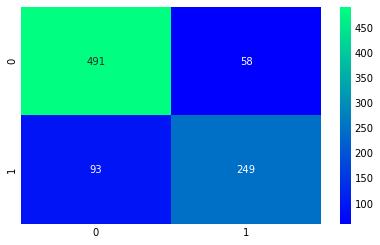

In [91]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)

result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

#### 4)  Feature Importance

[15:15:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


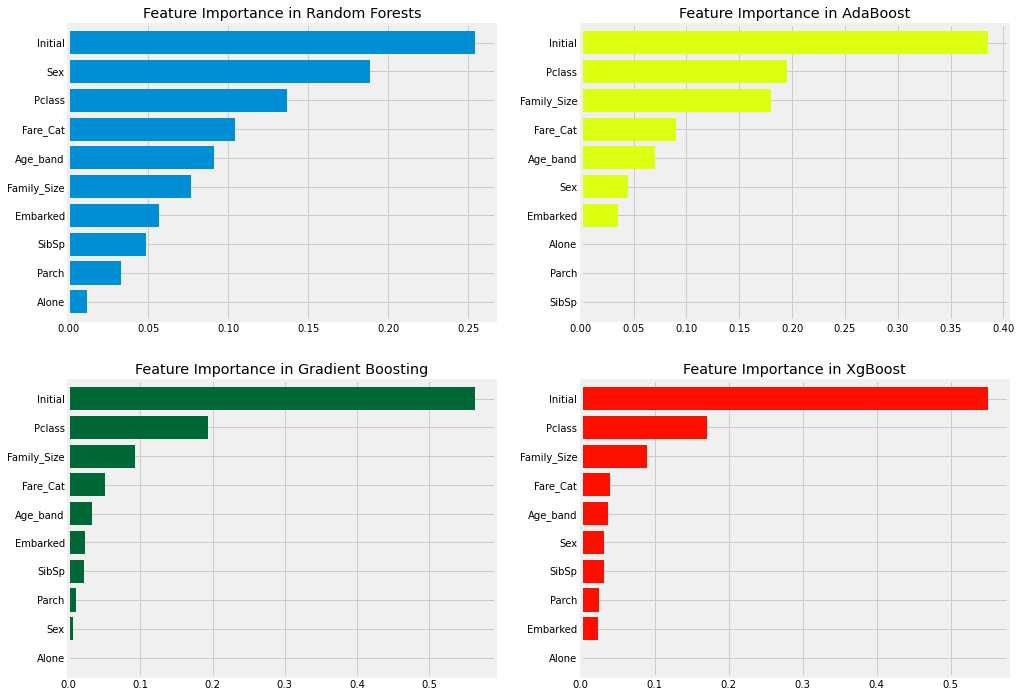

In [92]:
f,ax = plt.subplots(2,2,figsize=(15,12))

# Feature Importance in Random Forests
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

# Feature Importance in AdaBoost
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

# Feature Importance in Gradient Boosting
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

# Feature Importance in XgBoost
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()


왜 예제랑 다름?